In [41]:
from numpy import *

def loadDataSet(fileName,delim='\t'):
    fr=open(fileName)
    stringArr=[line.strip().split(delim) for line in fr.readlines()]
    datArr=[list(map(float,line)) for line in stringArr]
    return mat(datArr)


def replaceNanWithMean():
    dataMat=loadDataSet('secom.data',' ')
    numFeat=shape(dataMat)[1]
    for i in range(numFeat):
        #剔除缺失值后的均值
        meanVal = mean(dataMat[nonzero(~isnan(dataMat[:,i].A))[0],i]) 
        #用均值填充缺失值
        dataMat[nonzero(isnan(dataMat[:,i].A))[0],i] = meanVal  #set NaN values to mean
    
    return dataMat

def pca(dataMat,topNfeat=9999999999):
    meanVals=mean(dataMat,axis=0)
    
     #去均值化，均值变为0
    meanRemoved = dataMat - meanVals 
    # 计算协方差矩阵
    covMat=cov(meanRemoved,rowvar=0)
    #计算特征值和特征向量
    eigVals,eigVects=linalg.eig(mat(covMat))
    #特征值从小到大排名，返回该值索引
    eigValInd=argsort(eigVals)
    #取前topNfeat个大的值
    eigValInd = eigValInd[:-(topNfeat+1):-1]  
    #取出最大的N个特征所对应的N个特征向量
    redEigVects = eigVects[:,eigValInd]       
    #降维后的数据
    lowDDataMat = meanRemoved * redEigVects    
    #利用降维后的矩阵反构出原数据矩阵（用作测试，可以跟未压缩的原矩阵比对）
    reconMat = (lowDDataMat * redEigVects.T) + meanVals

    
    return lowDDataMat,reconMat,eigVals[eigValInd],eigVals




    
    

In [42]:
dataMat=loadDataSet('secom.data',' ')

print(dataMat,shape(dataMat),sep='\n')


[[3.0309300e+03 2.5640000e+03 2.1877333e+03 ...           nan
            nan           nan]
 [3.0957800e+03 2.4651400e+03 2.2304222e+03 ... 2.0100000e-02
  6.0000000e-03 2.0820450e+02]
 [2.9326100e+03 2.5599400e+03 2.1864111e+03 ... 4.8400000e-02
  1.4800000e-02 8.2860200e+01]
 ...
 [2.9788100e+03 2.3797800e+03 2.2063000e+03 ... 8.6000000e-03
  2.5000000e-03 4.3523100e+01]
 [2.8949200e+03 2.5320100e+03 2.1770333e+03 ... 2.4500000e-02
  7.5000000e-03 9.3494100e+01]
 [2.9449200e+03 2.4507600e+03 2.1954444e+03 ... 1.6200000e-02
  4.5000000e-03 1.3778440e+02]]
(1567, 590)


In [43]:
dataMat=replaceNanWithMean()

print(dataMat,shape(dataMat),sep='\n')


[[3.03093000e+03 2.56400000e+03 2.18773330e+03 ... 1.64749042e-02
  5.28333333e-03 9.96700663e+01]
 [3.09578000e+03 2.46514000e+03 2.23042220e+03 ... 2.01000000e-02
  6.00000000e-03 2.08204500e+02]
 [2.93261000e+03 2.55994000e+03 2.18641110e+03 ... 4.84000000e-02
  1.48000000e-02 8.28602000e+01]
 ...
 [2.97881000e+03 2.37978000e+03 2.20630000e+03 ... 8.60000000e-03
  2.50000000e-03 4.35231000e+01]
 [2.89492000e+03 2.53201000e+03 2.17703330e+03 ... 2.45000000e-02
  7.50000000e-03 9.34941000e+01]
 [2.94492000e+03 2.45076000e+03 2.19544440e+03 ... 1.62000000e-02
  4.50000000e-03 1.37784400e+02]]
(1567, 590)


In [44]:

lowDataMat,reconMat,eigVals_topN,eigVals=pca(dataMat,topNfeat=20)
print(shape(lowDataMat),shape(reconMat))




(1567, 20) (1567, 590)


In [35]:
shape(eigVals_topN)

(20,)

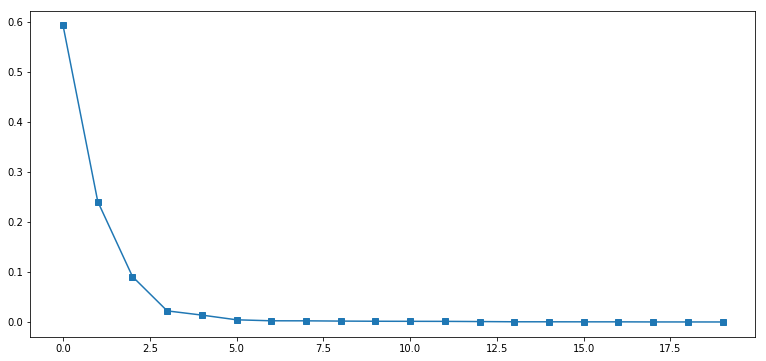

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(13,6))
Var = eigVals_topN
Var_sum = sum(eigVals)
Var_rate = Var/Var_sum
plt.plot(Var_rate,'s-') 
plt.show()

In [50]:
Var_rate


array([0.59254058, 0.24123819, 0.09150014, 0.02300579, 0.01459192,
       0.00518818, 0.00322658, 0.00314677, 0.0026308 , 0.00231307,
       0.00217535, 0.00207282, 0.00169084, 0.00125591, 0.00120353,
       0.00114092, 0.00111115, 0.00092458, 0.00090503, 0.00086145])